In [1]:
import numpy as np
from keras import models
from keras import layers
from keras import optimizers

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = np.load('extracted_features&labels.npz')

In [3]:
train_features = data['train_features']
train_labels = data['train_labels']
test_features = data['test_features']
test_labels = data['test_labels']
val_features = data['val_features']
val_labels = data['val_labels']
class_indices = data['class_indices']

In [5]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,10,512)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [8]:
history = model.fit(train_features, 
                    train_labels, 
                    epochs=30,
                    validation_data=(val_features, val_labels),
                    verbose=2)

Train on 827 samples, validate on 273 samples
Epoch 1/30
 - 3s - loss: 2.9486 - acc: 0.5284 - val_loss: 0.3558 - val_acc: 0.8791
Epoch 2/30
 - 1s - loss: 0.4420 - acc: 0.8561 - val_loss: 0.0426 - val_acc: 0.9927
Epoch 3/30
 - 1s - loss: 0.1752 - acc: 0.9359 - val_loss: 0.0533 - val_acc: 0.9817
Epoch 4/30
 - 1s - loss: 0.1389 - acc: 0.9516 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 5/30
 - 1s - loss: 0.0608 - acc: 0.9782 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 6/30
 - 1s - loss: 0.0576 - acc: 0.9819 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 7/30
 - 1s - loss: 0.0404 - acc: 0.9855 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 8/30
 - 1s - loss: 0.0315 - acc: 0.9903 - val_loss: 0.0183 - val_acc: 0.9890
Epoch 9/30
 - 1s - loss: 0.0302 - acc: 0.9903 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 10/30
 - 1s - loss: 0.0460 - acc: 0.9855 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 11/30
 - 1s - loss: 0.0280 - acc: 0.9903 - val_loss: 0.0095 - val_acc: 0.9963
Epoch 12/30
 - 1s - loss: 0.0239 - acc:

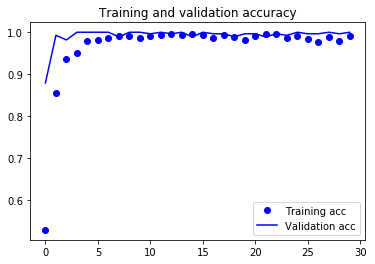

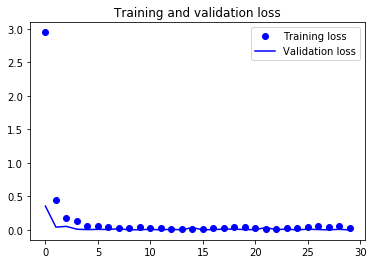

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.evaluate(test_features, test_labels)

273/273 [==============================] - 0s 242us/step


[0.001784714487407505, 1.0]

In [11]:
model.save('dense_top.h5')